<a href="https://colab.research.google.com/github/seungmei/ESAA_24_1/blob/main/0405%EA%B8%88%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EB%A8%B8%EC%99%84_Ch8_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D_p_512_516_p_529_543.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0405금과제 파머완 Ch8 텍스트분석 p. 512-516 p.529-543

## 6. 토픽 모델링 Topic Modeling - 20 뉴스그룹
- Topic Modeling: 문서 집합에 숨어있는 주제를 찾아내는 것. 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출.
 - LSA, Latent Semantic Analysis
 - LDA, Latent Dirichlet Allocation: 토픽모델링의 LDA와 차원축소의LDA, Linear Discriminant Analysis는 약어만 같을 뿐.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#모토사이클, 야구, 그래픽스. 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

#위에서 cats 변수로 기재된 카테고리만 추출. featch_20newgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                             categories=cats, random_state=0)

#LDA는 Count기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df=0.95, max_features = 1000, min_df = 2, stop_words='english',
                             ngram_range=(1,2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [2]:
#LatentDirichletAllocation 클래스의 n_components 파라미터를 이용해 이 토픽 개수를 조정
#random_state=0; 예제 수행 시마다 결과가 똑같게 하기 위해 입력
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [3]:
#.fit을 수행하면 LatentDirichletAllocation객체는 components 속성값을 가지게 됨
#components_는 개별 토픽 별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치
print(lda.components_.shape)
lda.components_
## 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있음.

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [4]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    #components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
    topic_word_indexed = topic.argsort()[::-1]
    top_indexes = topic_word_indexed[:no_top_words]

    #top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ''.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

#CountVectorizer객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

#토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)
##topic#0의 경우 명확하지 않고 일반적인 단어가 주를 이루고 있음.
##topic#1의 경우는 명확하게 컴퓨터 그래픽스 영역의 주제어 추출...

Topic # 0
year10gamemedicalhealthteam1220diseasecancer1993gamesyearspatientsgood
Topic # 1
donjustlikeknowpeoplesaidthinktimevedidnrightgoingsayllway
Topic # 2
imagefilejpegprogramgifimagesoutputformatfilescolorentry00usebit03
Topic # 3
likeknowdonthinkusedoesjustgoodtimebookreadinformationpeopleusedpost
Topic # 4
armenianisraelarmeniansjewsturkishpeopleisraelijewishgovernmentwardos dosturkeyarabarmenia000
Topic # 5
educomavailablegraphicsftpdatapubmotifmailwidgetsoftwaremitinformationversionsun
Topic # 6
godpeoplejesuschurchbelievechristdoeschristiansaythinkchristiansbiblefaithsinlife
Topic # 7
usedosthankswindowsusingwindowdoesdisplayhelplikeproblemserverneedknowrun


## 8. 문서 유사도

### 문서 유사도 측정 방법 - 코사인 유사도
- 코사인 유사도(Cosine Similarity)
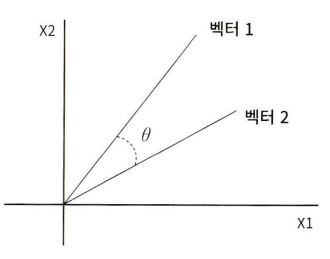

### 두 벡터 사잇각
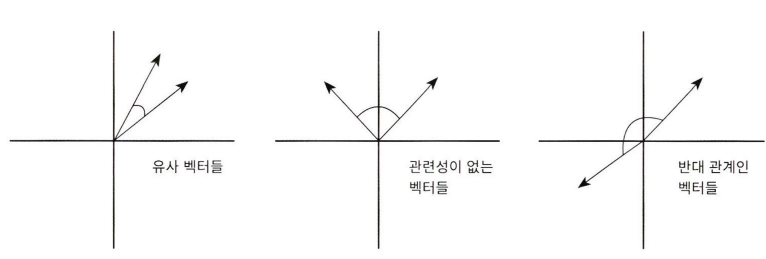

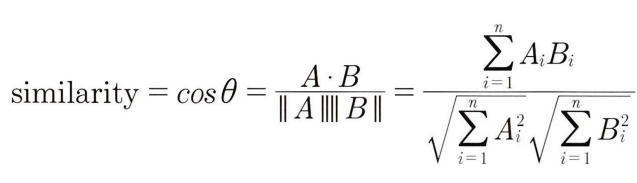

- 코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유
  - 먼저 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉬움.
  - 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉬움.
  - 문서가 매우 긴 경우, 단어의 빈도수도 더 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없음.

In [5]:
# 간단한 문서에 대해서 서로 간의 문서 유사도를 코사인 유사도 기반으로 구하기
# cos_similarity() 함수 작성
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

In [6]:
# doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = [
    'if you take the blue pill, the story ends',
    'if you take the red pill, you stay in Wonderland',
    'if you take the red pill, I show you how deep the rabbit hole goes'
]

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)
## 반환된 행렬은 희소 행렬이므로 앞에서 작성한 cos_similarity() 함수의 인자인 array로 만들기 위해 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환

(3, 18)


In [7]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

#첫번째 문장과 두번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도 : {0:3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도 : 0.402078


In [8]:
#두번째 문장과 세번째 문장의 유사도 측정
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도 : {0:3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도 : {0:3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도 : 0.404250
문장 2, 문장 3 Cosine 유사도 : 0.456473


In [9]:
# 사이킷런의 코사인 유사도 API를 이용해 예제의 문서 유사도 측정
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)
## 1은 비교기준은 문서 자신에 대한 유사도 측정, 두번째 유사도 값인 0.402는 첫번째 문서와 두번째 문서의 유사도

[[1.         0.40207758 0.40425045]]


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [11]:
# cosine_similarity()는 쌍으로 코사인 유사도 값을 제공할 수 있음.
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)
## cosine_similarity()의 반환 값은 (3,3)의 ndarray
## 1행: 1 & 1,2,3의 유사도
## 2행: 2 & 1,2,3의 유사도

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Review 데이터세트를 이용한 문서 유사도 측정

In [12]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환.
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환.
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [13]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = '/content'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
  df = pd.read_table(file_, index_col = None, header=0, encoding='latin1')
  filename_ = file_.split('\\')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename': filename_list, 'opinion_text':opinion_text})

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [15]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도를 알아보자.
문서를 피처 벡터화해 변환하면 문서 내 단어에 출현 빈도와 같은 값을 부여해 각 문서가 단어 피처 값으로 벡터화. -> 이 데이터를 cosine_similarity()를 이용해 상호 비교

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

#cluster_label=1인 데이터는 호텔로 군집화된 데이터. df에서 해당 인덱스 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화 된 문서들의 DataFrame Index:', hotel_indexes)

#호텔로 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫번째 문서와 다른 문서 간의 코사인 유사도 측정'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index: Index([2, 3, 4, 9, 10, 12, 19, 31, 37, 42], dtype='int64')
##### 비교 기준 문서명 /content/interior_toyota_camry_2007 와 타 문서 유사도######
[[1.         0.25981841 0.03617786 0.13971015 0.27804647 0.92932107
  0.11474644 0.20474749 0.0879083  0.06118389]]


<ipython-input-17-50eec42febdc>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df, palette='muted')


Text(0.5, 1.0, '/content/interior_toyota_camry_2007')

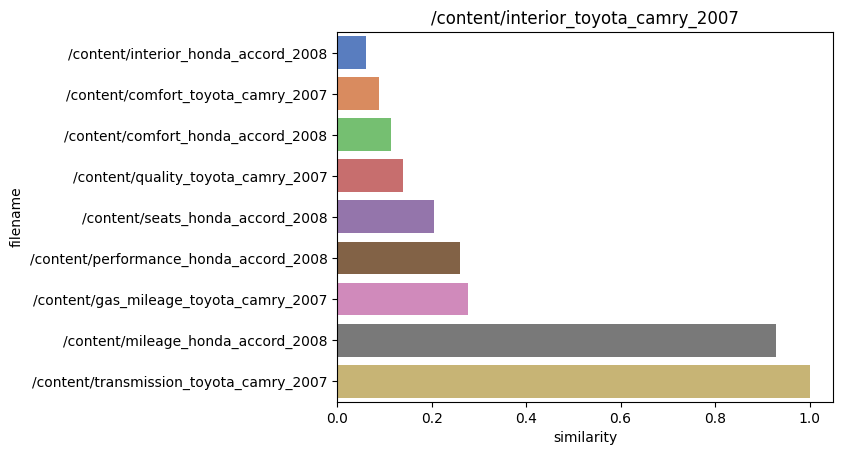

In [17]:
#유사도 높은 순으로 정렬 후 시각화
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기자신은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexed를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df, palette='muted')
plt.title(comparison_docname)

## 9. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석


### 한글 NLP 처리의 어려움
- 일반적으로 한글 언어 처리는 영어 등의 라틴어 처리보다 어려움. 띄어쓰기, '조사'를 전처리 시 제거하기 까다로움.

### KoNLpy 소개


In [18]:
!pip install konlpy

In [19]:
import pandas as pd

train_df = pd.read_csv('/content/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [20]:
train_df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [21]:
import re

train_df = train_df.fillna('')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미)
train_df['document'] = train_df['document'].apply(lambda x: re.sub(r'\d+', ' ', x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/ratings_test.txt', sep='\t')
test_df = test_df.fillna('')
test_df['document'] = test_df['document'].apply(lambda x: re.sub(r'\d+', ' ', x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

- TF-IDF 방식으로 단어를 벡터화할건데, 먼저 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화하자.
  - 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스를 이용.
- Twitter 객체의 morphs() 메서드 이용시 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환.
- 문장을 형태소 단어 형태로 반환하는 별도의 tokenizer 함수를 tw_tokenizer()라는 이름으로 생성

In [22]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


- TfidfVectorizer를 이용해 TF-IDF 피처 모델을 생성.
- tokenizer는 위에서 만든 tw_tokenizer() 함수 이용


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# twitter 객체의 morphs() 객체를 이용한 tokenizer 사용. ngram_range=(1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


-로지스틱 회귀를 이용해 분류 기반의 감성 분석 수행.
-로지스틱 회귀의 하이퍼 파라미터 C의 최적화를 위해 GridSearchCV를 이용하자.

In [24]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행.
lg_clf = LogisticRegression(random_state = 0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {"C": [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid = params, cv = 3, scoring = "accuracy", verbose = 1)
grid_cv.fit(tfidf_matrix_train, train_df["label"])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))
## C가 3.5일 때 최고 0.8593의 정확도

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 3.5} 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 테스트 세트를 이용해 최종 감성 분석 예측 수행해보자.
  - 테스트 세트를 이용해 예측할 때는 학습할 때 적용한 TfidfVectorizer를 그대로 사용해야. <= 그래야만 학습 시 설정된 TfidfVectorizer의 피처 개수와 테스트 데이터를 TfidfVectorizer 로 변환할 피처 개수가 같아짐.
  - 학습 데이터에 사용된 TfidfVectorizer 객체 변수인 tfidf_vect를 이용해 transform()을 테스트 데이터의 document칼럼에 수행

In [25]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 gridsearchcv에서 최적 파라미터로 학습된 calssifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86186
